<a href="https://colab.research.google.com/github/SachkovaYuliia/blog_django/blob/master/DA_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пошуковий аналіз даних

<h2>Мета</h2>

Ознайомитись з методами перевірки статистичних гіпотез. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати дані за допомогою візуалізацій
* Робити описовий аналіз
* Групувати дані для аналізу
* Знаходити зв'язок між ознаками
* Перевіряти гіпотези про значущість коефіцієнта кореляції та про вигляд закону розподілу
* Робити дисперсійний аналіз



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a>, який зберегли наприкінці попередньої роботи (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. Дослідити ознаки, побудувавши їх візуалізації
2. Порахувати кореляцію між всіма кількісними ознаками
3. Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. Візуально оцініть наявність та силу зв'язку між цими ознаками.   
4. Які кількісні ознаки можуть бути предикторами кількості викидів СО2?
5. Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити ознаки, побудувавши їх візуалізації</p>
</div>


Зчитую дані з файлу у датафрейм

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

DATA_PATH = 'clean_data2.csv'

df = pd.read_csv(DATA_PATH, sep=',', encoding='cp1252')

print(df.head())


Saving clean_data2.csv to clean_data2 (4).csv
User uploaded file "clean_data2 (4).csv" with length 19107 bytes
     Country Name                      Region  GDP per capita  Population  \
0     Afghanistan                  South Asia      561.778746    34656032   
1         Albania       Europe & Central Asia     4124.982390     2876101   
2         Algeria  Middle East & North Africa     3916.881571    40606052   
3  American Samoa         East Asia & Pacific    11834.745230       55599   
4         Andorra       Europe & Central Asia    36988.622030       77281   

   CO2 emission       Area  Population Density  
0      9809.225   652860.0           53.083405  
1      5716.853    28750.0          100.038296  
2    145400.217  2381740.0           17.048902  
3      9108.828      200.0          277.995000  
4       462.042      470.0          164.427660  


Будую графіки

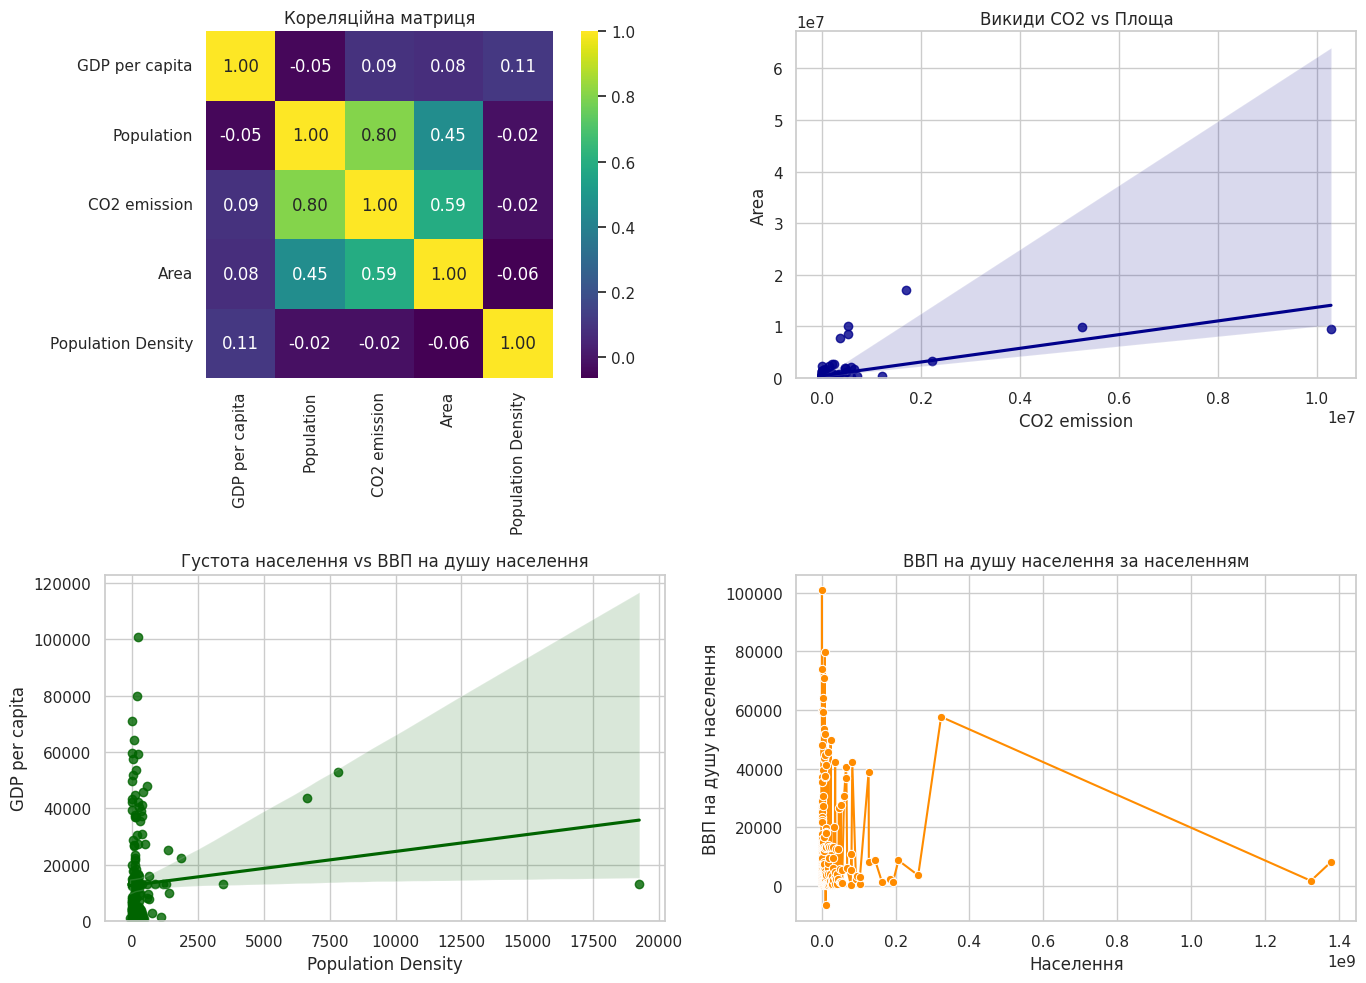

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Задання кольорових параметрів
sns.set(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Кореляційна матриця
correlation_matrix = df[['GDP per capita', 'Population', 'CO2 emission', 'Area', 'Population Density']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, ax=axes[0, 0])  # Зелено-жовта палітра
axes[0, 0].set_title('Кореляційна матриця')

# Викиди CO2 vs Площа
sns.regplot(x='CO2 emission', y='Area', data=df, ax=axes[0, 1], color="darkblue")  # Темно-синій
axes[0, 1].set_ylim(0,)
axes[0, 1].set_title('Викиди CO2 vs Площа')

# Густота населення vs ВВП на душу населення
sns.regplot(x='Population Density', y='GDP per capita', data=df, ax=axes[1, 0], color="darkgreen")  # Темно-зелений
axes[1, 0].set_ylim(0,)
axes[1, 0].set_title('Густота населення vs ВВП на душу населення')

# ВВП на душу населення за населенням
sns.lineplot(x='Population', y='GDP per capita', data=df, ax=axes[1, 1], marker='o', color="darkorange")  # Темно-помаранчевий
axes[1, 1].set_title('ВВП на душу населення за населенням')
axes[1, 1].set_xlabel('Населення')
axes[1, 1].set_ylabel('ВВП на душу населення')

# Розміщення графіків
plt.tight_layout()
plt.show()


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Порахувати кореляцію між всіма кількісними ознаками</p>
</div>


Рахую кореляцію між всіма кількісними ознаками

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print(df.dtypes)
selected_df = df[['GDP per capita', 'Population', 'CO2 emission', 'Area','Population Density']].corr()
print(selected_df)


Country Name           object
Region                 object
GDP per capita        float64
Population              int64
CO2 emission          float64
Area                  float64
Population Density    float64
dtype: object
                    GDP per capita  Population  CO2 emission      Area  \
GDP per capita            1.000000   -0.046855      0.086232  0.075090   
Population               -0.046855    1.000000      0.804217  0.453715   
CO2 emission              0.086232    0.804217      1.000000  0.589620   
Area                      0.075090    0.453715      0.589620  1.000000   
Population Density        0.109496   -0.022453     -0.022537 -0.064474   

                    Population Density  
GDP per capita                0.109496  
Population                   -0.022453  
CO2 emission                 -0.022537  
Area                         -0.064474  
Population Density            1.000000  


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. </p>
<p>Візуально оцініть наявність та силу зв'язку між цими ознаками.</p>
</div>


Будую діаграму розсіювання для кількісних ознак та 'CO2 emission'

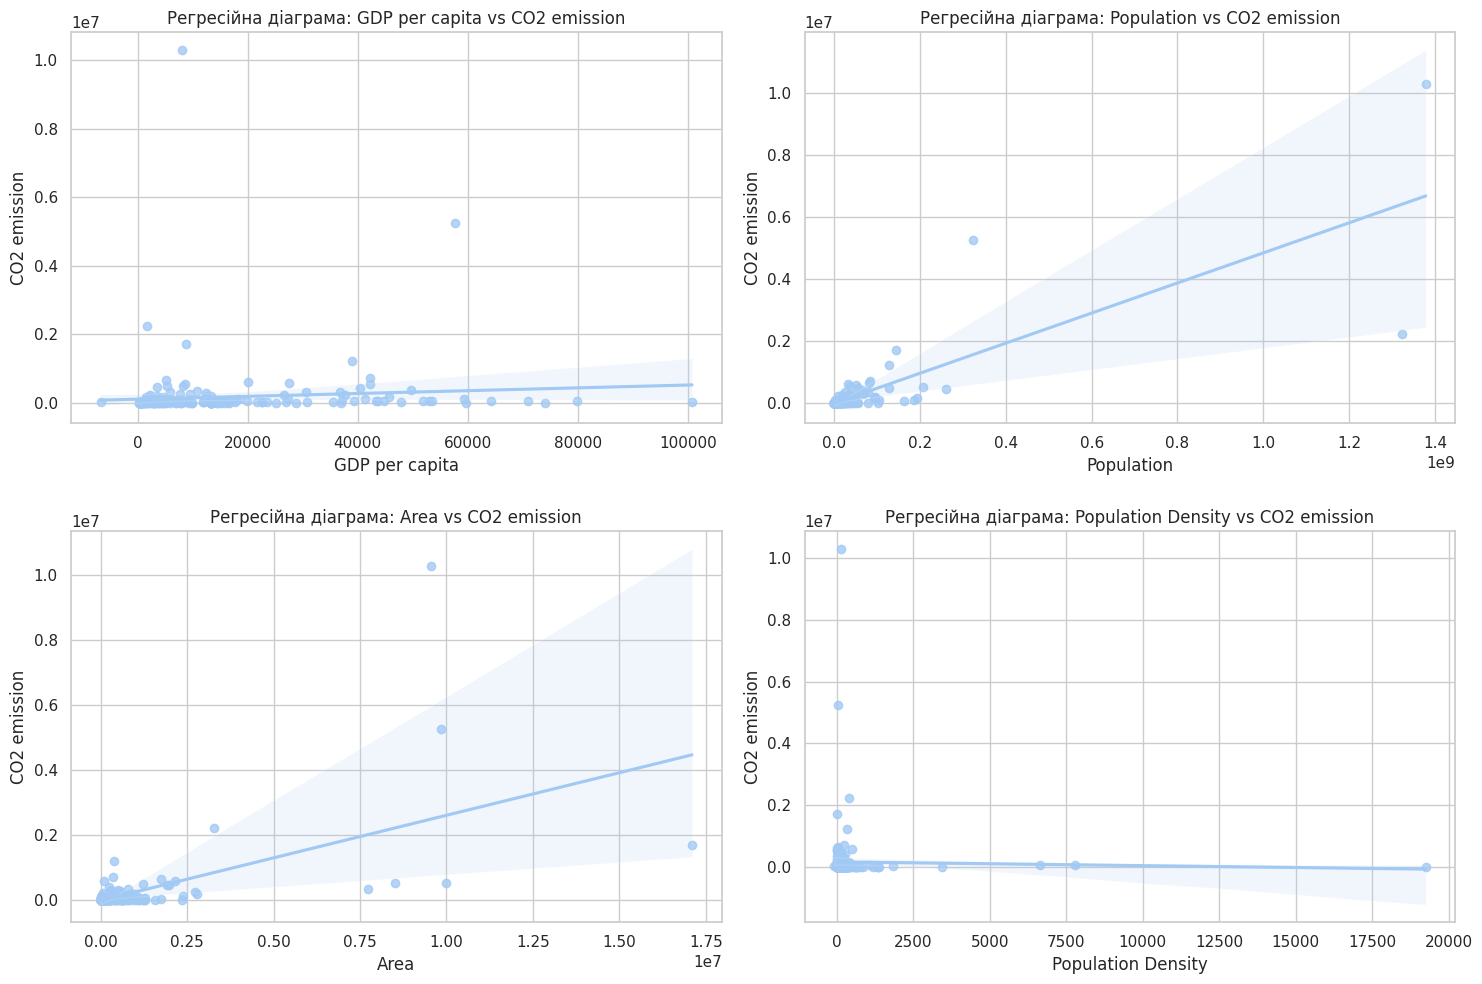

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

columns = ['GDP per capita', 'Population', 'Area', 'Population Density']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=df[col], y=df['CO2 emission'], data=df)
    plt.title(f'Регресійна діаграма: {col} vs CO2 emission')
    plt.xlabel(col)
    plt.ylabel('CO2 emission')

plt.tight_layout()
plt.show()

# На діаграмі "GDP per capita vs CO2 emission" спостерігаємо сильний лінійний
#зв'язок
#  На діаграмах "Population vs CO2 emission" та "Area vs CO2 emission"
# позитивний кореляційний зв'язок
# На останьому графіку спостерігаємо слабкий кореляційний зв'язок, що свідчить
# про те, що Population Density не є ключовим фактором викидів.

Будую діаграму розмаху для 'CO2 emission' по регіонам

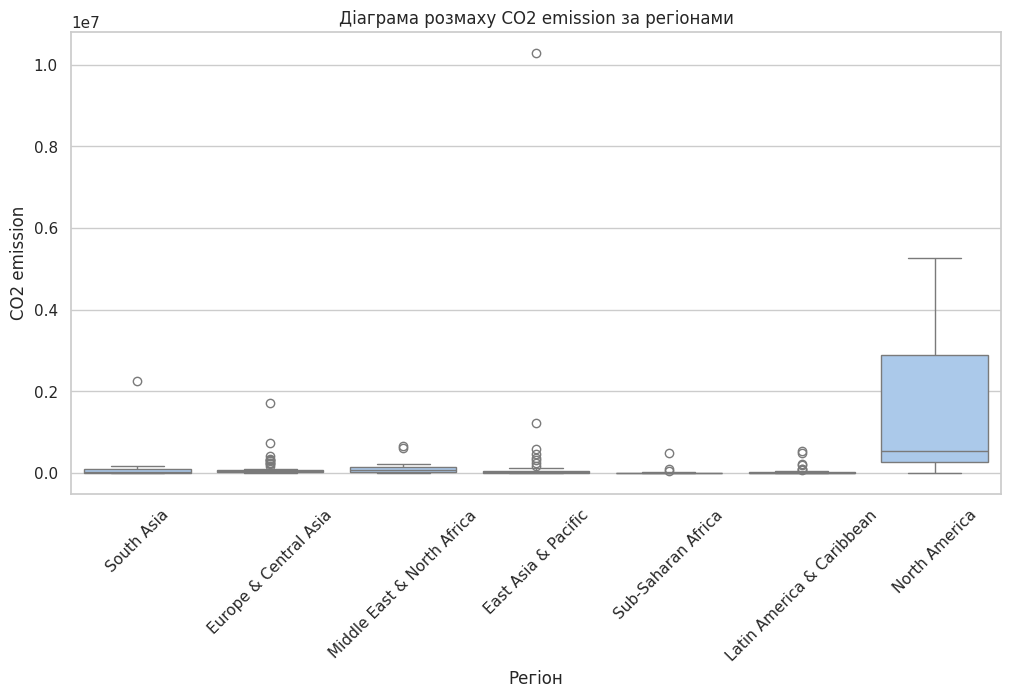

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='CO2 emission', data=df)
plt.title('Діаграма розмаху CO2 emission за регіонами')
plt.xlabel('Регіон')
plt.ylabel('CO2 emission')
plt.xticks(rotation=45)
plt.show()

# На діаграмі спостерігаємо найбільший розмах показників викидів в Північній
# Америці, тобто сильні відмінності між країнами в регіоні, а найнижчий - в
# Африкі.
# Низьке розміщенн медіани в Північній Америці свідчить про невисокий рівень
# промислової активності в регіоні.


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Які кількісні ознаки можуть бути предикторами кількості викидів СО2?</p>
</div>


Обчислюю коефіцієнт кореляції Пірсона та P-value для всіх кількісних змінних та 'CO2 emission'

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from scipy import stats
import pandas as pd
import numpy as np

quantitative_columns = ['GDP per capita', 'Population', 'CO2 emission', 'Area', 'Population Density']

df_clean = df[quantitative_columns].replace([np.inf, -np.inf], np.nan).dropna()

results = []

for column in quantitative_columns:
    if column != 'CO2 emission':
        pearson_coef, p_value = stats.pearsonr(df_clean[column], df_clean['CO2 emission'])
        results.append({'Variable': column, 'Pearson Coefficient': pearson_coef, 'P-Value': p_value})

results_df = pd.DataFrame(results)

print(results_df)

# Основними кількісними ознаками, які можуть слугувати предикторами кількості
# викидів CO₂, є Population (найсильніший предиктор) та Area (помірний вплив).
# Інші змінні, такі як GDP per capita та Population Density, на основі отриманих
# результатів, не є значущими предикторами.




             Variable  Pearson Coefficient       P-Value
0      GDP per capita             0.091813  1.808727e-01
1          Population             0.804239  8.354277e-50
2                Area             0.589620  1.989748e-21
3  Population Density            -0.022537  7.430604e-01


In [ ]:
from google.colab import files
import pandas as pd

# Завантаження файлу
uploaded = files.upload()

# Виведення інформації про завантажений файл
for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

# Шлях до файлу
DATA_PATH = 'clean_data2.csv'

# Завантаження даних з файлу
df = pd.read_csv(DATA_PATH, sep=',', encoding='cp1252')

# Перевірка на наявність пустих клітинок
print("Перевірка на порожні клітинки:")
print(df.isnull().sum())  # Підрахунок порожніх клітинок в кожному стовпці

# Видалення рядків з порожніми клітинками
df_cleaned = df.dropna()

# Збереження очищених даних у новий файл
cleaned_path = 'cleaned_data.csv'
df_cleaned.to_csv(cleaned_path, index=False)

# Виведення перших кількох рядків очищених даних
print("Очищені дані:")
print(df_cleaned.head())

# Завантаження очищеного файлу
files.download(cleaned_path)


Saving clean_data2.csv to clean_data2 (5).csv
User uploaded file "clean_data2 (5).csv" with length 19107 bytes
Перевірка на порожні клітинки:
Country Name          0
Region                0
GDP per capita        0
Population            0
CO2 emission          0
Area                  3
Population Density    3
dtype: int64
Очищені дані:
     Country Name                      Region  GDP per capita  Population  \
0     Afghanistan                  South Asia      561.778746    34656032   
1         Albania       Europe & Central Asia     4124.982390     2876101   
2         Algeria  Middle East & North Africa     3916.881571    40606052   
3  American Samoa         East Asia & Pacific    11834.745230       55599   
4         Andorra       Europe & Central Asia    36988.622030       77281   

   CO2 emission       Area  Population Density  
0      9809.225   652860.0           53.083405  
1      5716.853    28750.0          100.038296  
2    145400.217  2381740.0           17.048902  
3   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам</p>
</div>


Групую дані, щоб побачити чи впливає 'Region' на 'CO2 emission'.

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
grouped_data = df[['Region','CO2 emission']].groupby(['Region'])
grouped_data.head(2)



,Region,CO2 emission
0,South Asia,9809.225
1,Europe & Central Asia,5716.853
2,Middle East & North Africa,145400.217
3,East Asia & Pacific,9108.828
4,Europe & Central Asia,462.042
5,Sub-Saharan Africa,34763.160
6,Latin America & Caribbean,531.715
7,Latin America & Caribbean,204024.546
10,East Asia & Pacific,361261.839
14,Middle East & North Africa,31338.182


Скористаюсь функцією <code>f_oneway</code> з модуля "stats" для отримання F-test score та P-value.

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

grouped_data = df[['Region', 'CO2 emission']].groupby('Region')['CO2 emission'].apply(list)

print(grouped_data)

f_statistic, p_value = stats.f_oneway(*grouped_data)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Є статистично значуща різниця між викидами CO2 в різних регіонах.")
else:
    print("Немає статистично значущої різниці між викидами CO2 в різних регіонах.")

Region
East Asia & Pacific           [9108.828, 361261.839, 9108.828, 6684.941, 102...
Europe & Central Asia         [5716.853, 462.042, 5529.836, 58712.337, 37487...
Latin America & Caribbean     [531.715, 204024.546, 872.746, 2416.553, 1272....
Middle East & North Africa    [145400.217, 31338.182, 722.399, 201894.019, 6...
North America                                [575.719, 537193.498, 5254279.285]
South Asia                    [9809.225, 73189.653, 1001.091, 2238377.137, 1...
Sub-Saharan Africa            [34763.16, 6318.241, 7033.306, 2849.259, 440.0...
Name: CO2 emission, dtype: object
F-Statistic: 3.552273566180506
P-Value: 0.0022632936475130904
Є статистично значуща різниця між викидами CO2 в різних регіонах.


Результат із F-Statistic: 3.552273566180506 показником тесту, який показує  наявну кореляцію CO₂ між регіонами, і P-value   нижче 0.05 вказує на те, що різниця у викидах CO₂ між регіонами є статистично значущою. Але чи означає це, що досліджувані групи обов'язково корелюють між собою?

Розглянемо їх окремо.

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from itertools import combinations

grouped_data = df.groupby('Region')['CO2 emission'].apply(list)

regions = grouped_data.index
region_pairs = combinations(regions, 2)

for region1, region2 in region_pairs:
    f_val, p_val = stats.f_oneway(grouped_data[region1], grouped_data[region2])
    print(f"ANOVA results for {region1} vs {region2}: F = {f_val:.4f}, P = {p_val:.4f}")

# Тести показали, що різниця у викидах CO₂ між регіонами існує, але не у всіх випадках
#  вона є статистично значущою.
# Можна зробити висновок, що хоча F-значення загального тесту вказує на різницю в
# викидах CO₂ між регіонами, це не обов'язково означає, що всі пари регіонів корелюють
# між собою. Тільки деякі пари (наприклад, Північна Америка проти інших регіонів)
# мають суттєві відмінності в викидах CO₂.

ANOVA results for East Asia & Pacific vs Europe & Central Asia: F = 1.4467, P = 0.2321
ANOVA results for East Asia & Pacific vs Latin America & Caribbean: F = 1.6281, P = 0.2058
ANOVA results for East Asia & Pacific vs Middle East & North Africa: F = 0.4724, P = 0.4947
ANOVA results for East Asia & Pacific vs North America: F = 2.1207, P = 0.1535
ANOVA results for East Asia & Pacific vs South Asia: F = 0.0110, P = 0.9168
ANOVA results for East Asia & Pacific vs Sub-Saharan Africa: F = 2.2044, P = 0.1414
ANOVA results for Europe & Central Asia vs Latin America & Caribbean: F = 2.2793, P = 0.1343
ANOVA results for Europe & Central Asia vs Middle East & North Africa: F = 0.0673, P = 0.7961
ANOVA results for Europe & Central Asia vs North America: F = 27.5323, P = 0.0000
ANOVA results for Europe & Central Asia vs South Asia: F = 2.4411, P = 0.1231
ANOVA results for Europe & Central Asia vs Sub-Saharan Africa: F = 5.9562, P = 0.0164
ANOVA results for Latin America & Caribbean vs Middle East

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.
2. Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.
3. Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

Групування кількісної змінної в категорії було в попередній лабораторній роботі. Використайте функцію "cut"
</details>

Rich country
Upper Middle    72
Lower Middle    65
Very High       30
Low             28
High            21
Name: count, dtype: int64


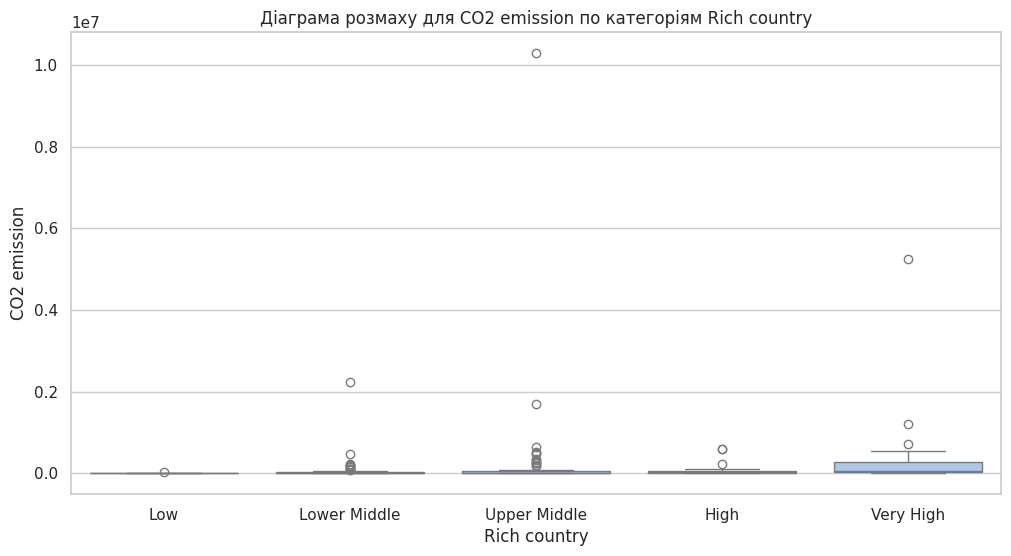

ANOVA results for CO2 emission by Rich country categories: F = 1.0098260758170807, P = 0.40330384956216736


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
bins = [0, 1000, 5000, 15000, 30000, float('inf')]  # визначення меж для категорій
labels = ['Low', 'Lower Middle', 'Upper Middle', 'High', 'Very High']

df['Rich country'] = pd.cut(df['GDP per capita'], bins=bins, labels=labels)

print(df['Rich country'].value_counts())

plt.figure(figsize=(12, 6))
sns.boxplot(x='Rich country', y='CO2 emission', data=df)
plt.title('Діаграма розмаху для CO2 emission по категоріям Rich country')
plt.xlabel('Rich country')
plt.ylabel('CO2 emission')
plt.show()

grouped_data = df.groupby('Rich country', observed=False)['CO2 emission'].apply(list)

f_val, p_val = stats.f_oneway(*grouped_data)

print(f"ANOVA results for CO2 emission by Rich country categories: F = {f_val}, P = {p_val}")
# Найбільша різниця у викидах CO₂ спостерігається між Північною Америкою та іншими регіонами,
# зокрема Африкою та Латинською Америкою і Карибами.
# За категоріями Rich country існує статистично значуща різниця в викидах CO₂. Це підтверджує,
#що рівень економічного розвитку країни впливає на рівень викидів CO₂, причому найбагатші країни мають значно вищі викиди.
